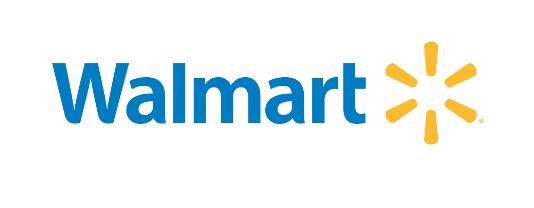

### Walmart is an American multinational retail corporation that operates a chain of hypermarkets (also called supercenters), discount department stores, and grocery stores in the United States, headquartered in Bentonville, Arkansas. 

### The company was founded by Sam Walton in nearby Rogers, Arkansas in 1962.

### As of July 31, 2022, Walmart has 10,585 stores and clubs in 24 countries, operating under 46 different names. Out of which we have chosen 45 stores for basic analysis.

### Walmart is the world's largest company by revenue, with about US $570 billion in annual revenue, according to the Fortune Global 500 list in May 2022.

### The file has information about the Weekly Sales of 45 stores for the year 2010-2012 including the factors affectors affecting Sales such as Holidays, Temperature, Fuel Price, CPI, and Unemployment.

## Holiday Events in the Week

#### Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12
#### Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12
#### Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12
#### Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12

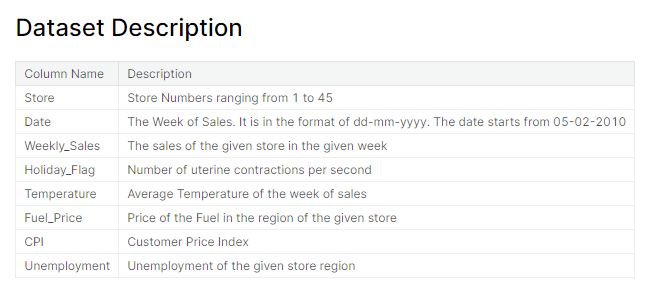

# EDA

### Importing libariry

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("walmart-sales-dataset-of-45stores.csv",sep=",",encoding='utf-8')
df.sample(5)
df1=df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
df['Date'] = pd.to_datetime(df['Date'],format='%d-%m-%Y')

In [9]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [11]:
df[['Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','Unemployment']].describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,0.069930,60.663782,3.358607,7.999151
std,5.643666e+05,0.255049,18.444933,0.459020,1.875885
min,2.099862e+05,0.000000,-2.060000,2.472000,3.879000
25%,5.533501e+05,0.000000,47.460000,2.933000,6.891000
50%,9.607460e+05,0.000000,62.670000,3.445000,7.874000
75%,1.420159e+06,0.000000,74.940000,3.735000,8.622000
max,3.818686e+06,1.000000,100.140000,4.468000,14.313000


## Corrlation

<Axes: >

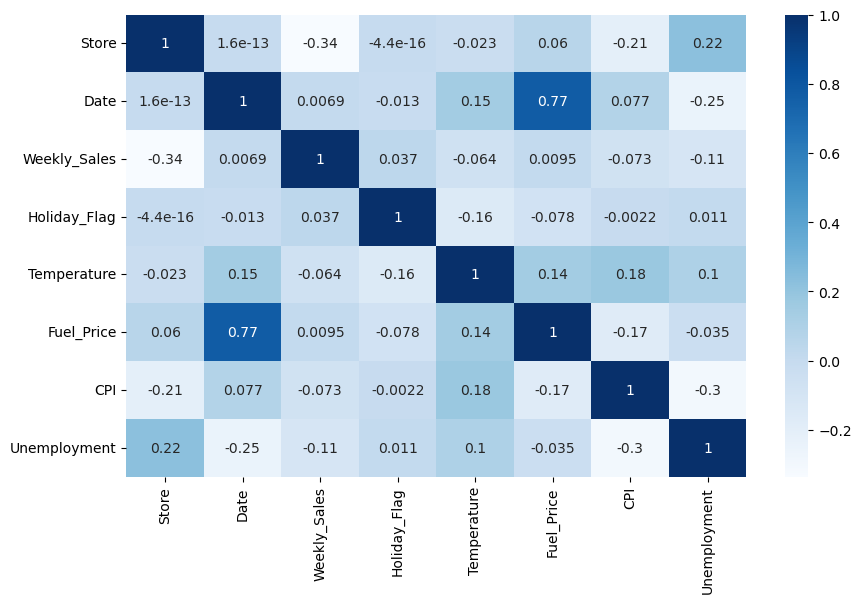

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

# Q1: what is the ratio between weeklysales Temperature with store ?

Text(0.5, 1.0, 'Temperature with weekly_Sales')

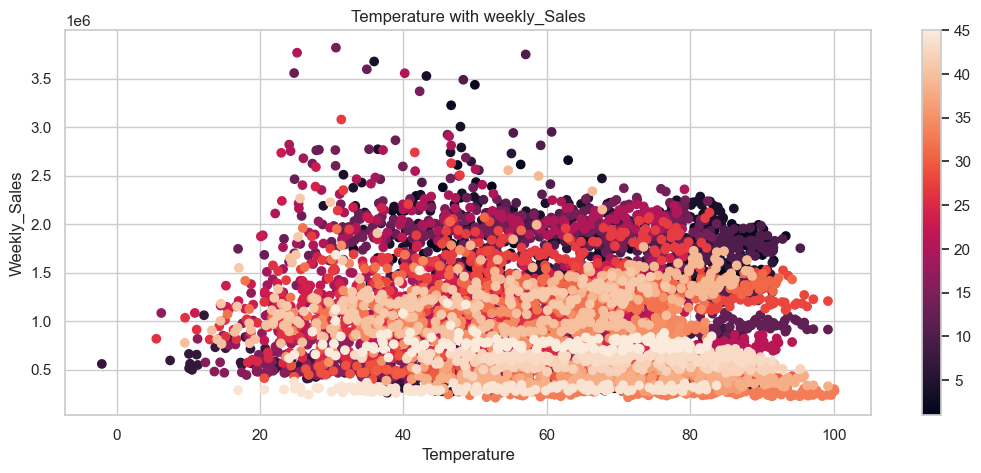

In [13]:
plt.figure(figsize = (13,5))
sns.set(style='whitegrid')
plt.scatter( df['Temperature'] ,df['Weekly_Sales'] , c = df['Store'])
plt.colorbar()
plt.ylabel("Weekly_Sales")
plt.xlabel("Temperature")
plt.title("Temperature with weekly_Sales")

#### At temperature 0 to 20 the weekly_sales is low at all stores ,and temperature from 20 to 100 weekly_sales are normal and at stores 35 to 45 weekly_sales are low and at stores from 1 to 15 the weekly_sales are high.

# Q2 : what is the ratio weekly_sales and fuel_price with store ?

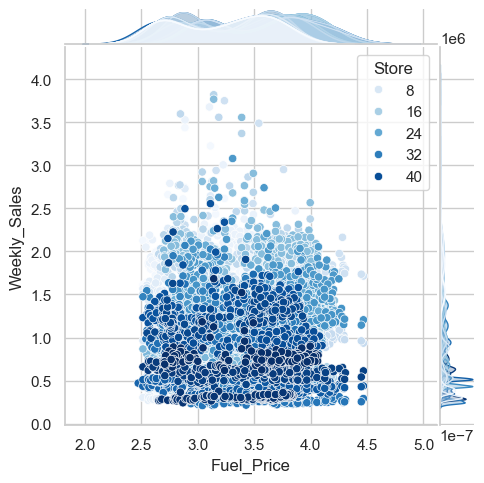

In [14]:
sns.jointplot(y= df["Weekly_Sales"], x= df["Fuel_Price"], data = df, hue = df["Store"],palette='Blues',height=5, ratio=10, space=.1)

####  weekly_sales are increse when fuel_price from 2.75 to 3.75 and stores 1 to 16 and weekly_sales are high .

# Q3 : what is the relation between Store and unemployment ?

<Axes: xlabel='Store', ylabel='Unemployment'>

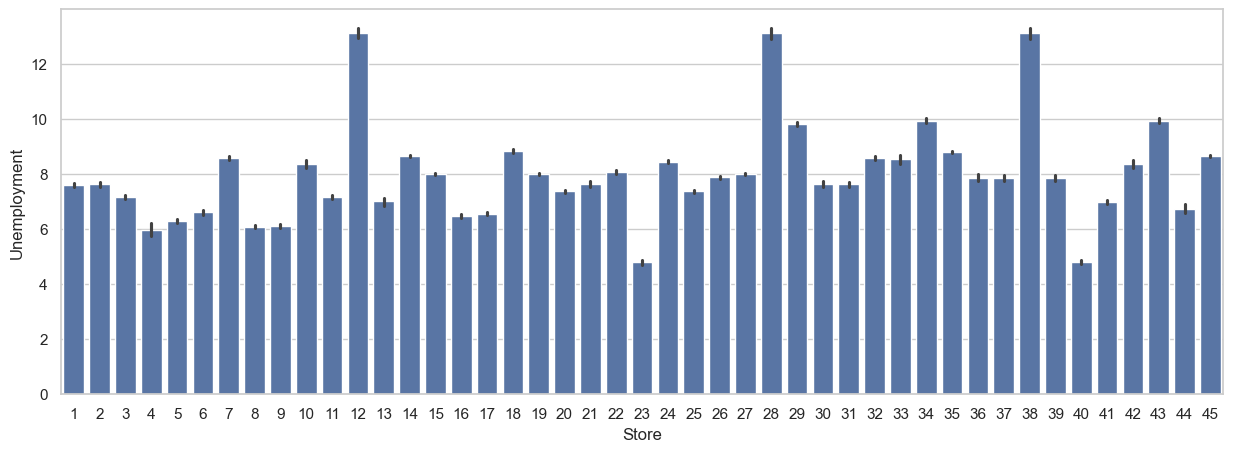

In [15]:
plt.figure(figsize = (15,5))
sns.barplot(df,x='Store',y='Unemployment')

#### At stores 12 ,28 and 38 have heigher number of unemployment and stores 23 and 40 have lower number of unemployement.

# Q4: what is the ratio between weekly_sales and store with holiday_flag ?

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

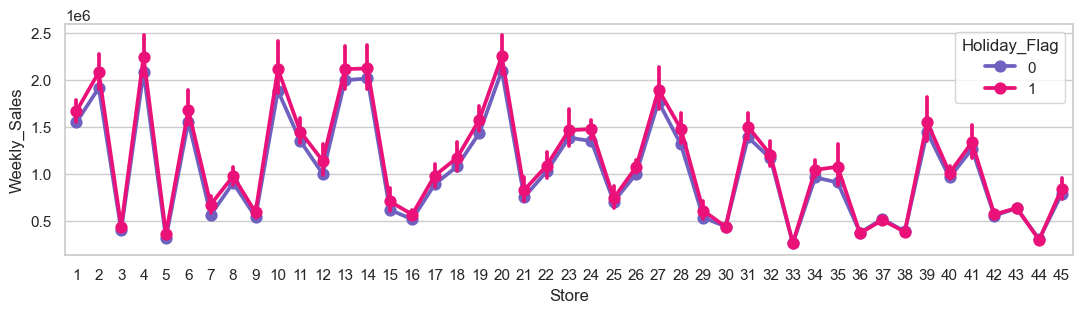

In [16]:
plt.figure(figsize = (13,3))
sns.pointplot(df,x='Store',y='Weekly_Sales',hue='Holiday_Flag',palette=["#6F61C0","#EA1179"])

#### I find that store number of 20 has heigher weekly_sales at holiday and no holiday , store number of 44 , 33 and 5 have lower weekly_sales at holiday and no holiday.

# Q5 : What is the ratio between store and cpi with holiday ?

<Axes: xlabel='Store', ylabel='CPI'>

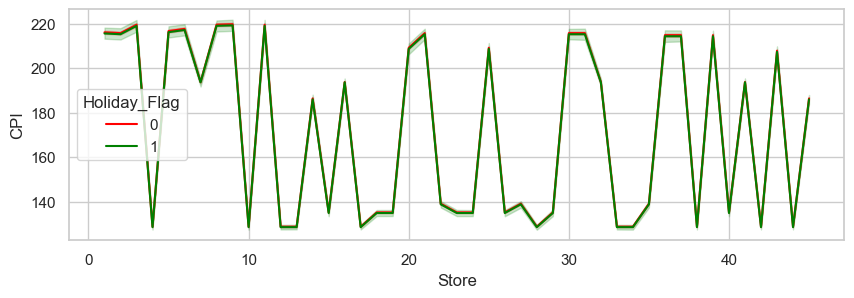

In [17]:
plt.figure(figsize = (10,3))
sns.lineplot(df,x='Store',y='CPI',hue='Holiday_Flag',palette=["Red","Green"])

#### I find that alot of stores have low CPI at holiday and no holiday such as stores number of 3 and 10

# Time Serises analysis

## sum of sales par week

<Axes: xlabel='Date'>

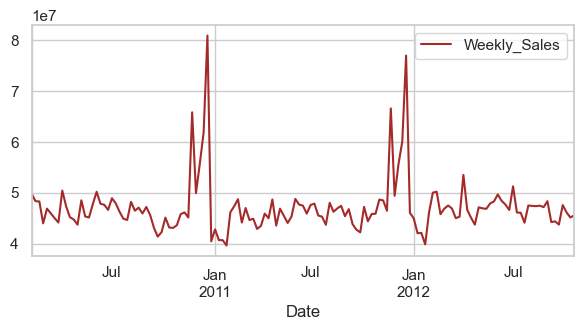

In [18]:
sales=df.groupby("Date")[["Weekly_Sales"]].sum()
sales.plot(color='brown',figsize=(7,3))

#### The weekly_sales don't stable where at the begin and end  at each year happen change in sales.

## sum fule price per week

<Axes: xlabel='Date'>

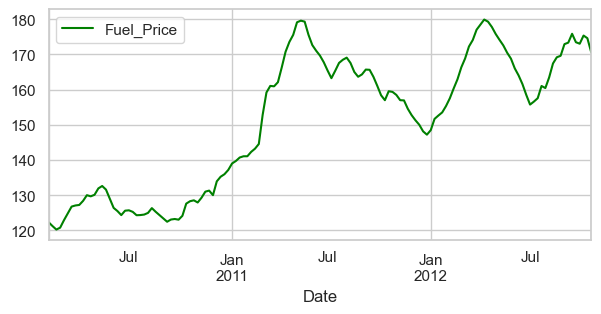

In [19]:
sales1=df.groupby("Date")[["Fuel_Price"]].sum()
sales1.plot(color='green',figsize=(7,3))

#### At the fuel price exist trend 

## sum of cpi per week

<Axes: xlabel='Date'>

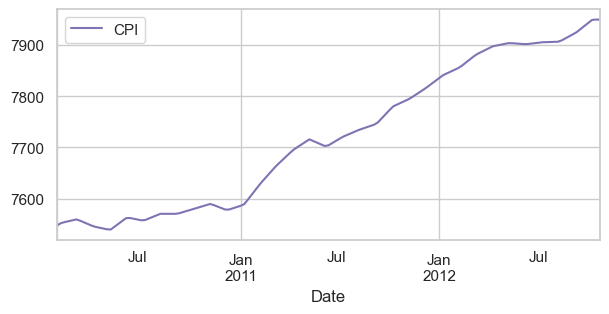

In [20]:
sales2=df.groupby("Date")[["CPI"]].sum()
sales2.plot(color='m',figsize=(7,3))

#### At the CPI exist trend also

## I will transform date to month ,day and year 

In [21]:
df['Month']=df['Date'].dt.month_name()
df['Day']=df['Date'].dt.day_name()
df['Year']=df['Date'].dt.year
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Day,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,February,Friday,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,February,Friday,2010


## sum of sales per month

<Axes: xlabel='Month'>

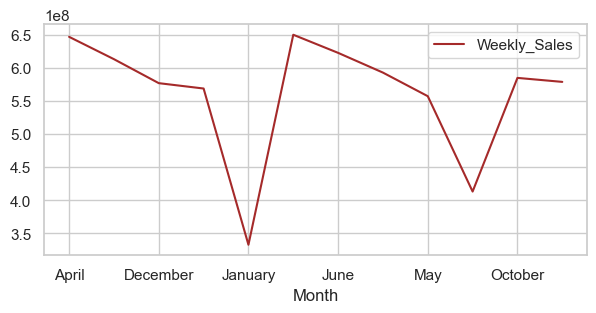

In [22]:
df.groupby(['Month'])[['Weekly_Sales']].sum().plot(c='brown',figsize=(7,3))

#### I find that at january ,weekly_sales is very low becouse holiday.

<Axes: xlabel='Month'>

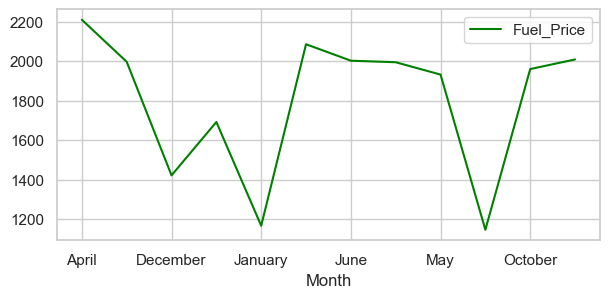

In [23]:
d=df.groupby(['Month'])[['Fuel_Price']].sum()
d.plot(c='green',figsize=(7,3))


#### At january and November have lower fuel price.

<Axes: xlabel='Month'>

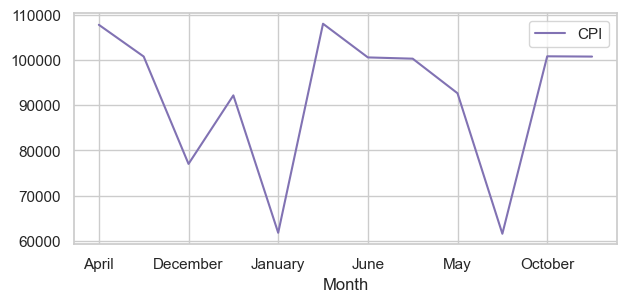

In [24]:
df.groupby("Month")[["CPI"]].sum().plot(c='m',figsize=(7,3))

#### I find january and november have lower CPI

### Note : at begin and end year,down sales becouse holiday 

## sum of sales per year

<Axes: xlabel='Year'>

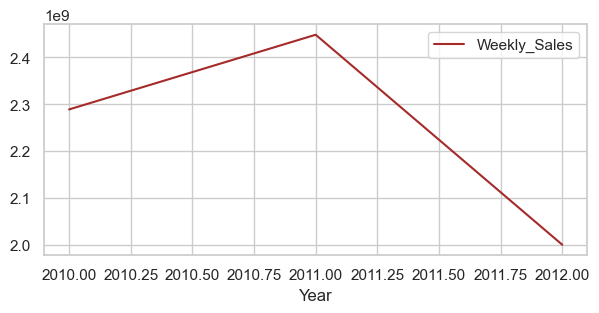

In [25]:
df.groupby(['Year'])[['Weekly_Sales']].sum().plot(c='brown',figsize=(7,3))

<Axes: xlabel='Year'>

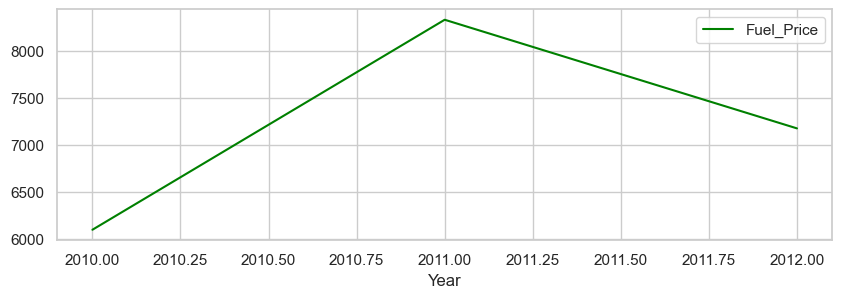

In [26]:
df.groupby(['Year'])[['Fuel_Price']].sum().plot(c='green',figsize=(10,3))

<Axes: xlabel='Year'>

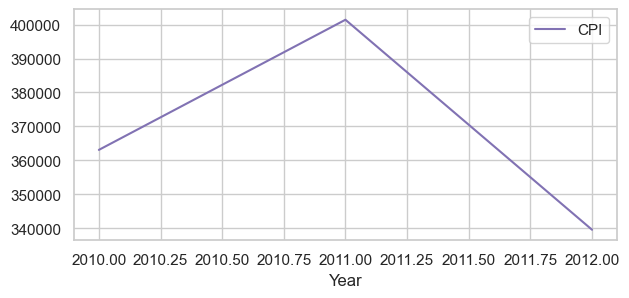

In [27]:
df.groupby("Year")[["CPI"]].sum().plot(c='m',figsize=(7,3))

#### Note : sum of Sales increase at 2011 and decrease at 2012 
#### Note : sum of Fuel price increase at 2011 and decrease at 2010
#### Note : sum of CPI increase at 2011 and decrease at 2012

## Temprature with date

<Axes: xlabel='Date'>

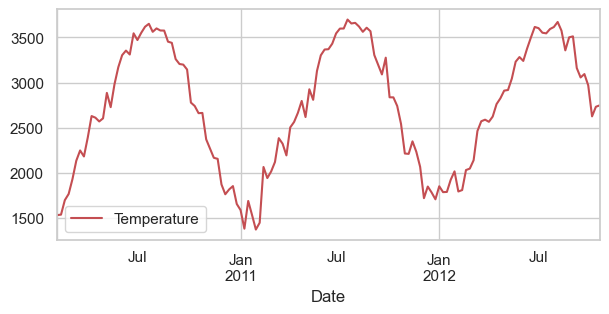

In [28]:
df.groupby("Date")[["Temperature"]].sum().plot(c='r',figsize=(7,3))

## This graph show that tempreature is seasonality pattern.

## Unemployment with Date

C:\Users\prady\AppData\Local\Temp\ipykernel_25356\1545319854.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


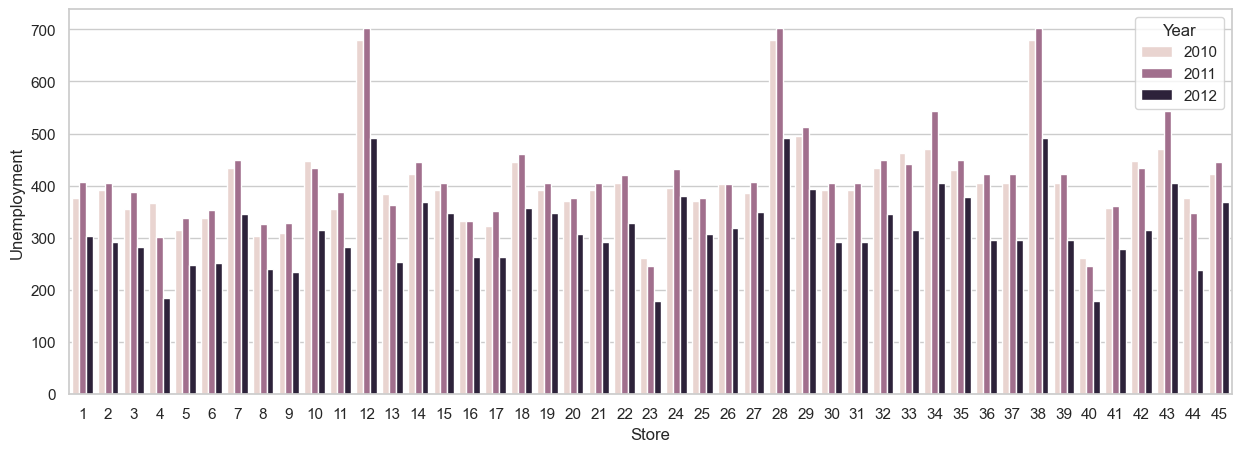

In [29]:
d2=df.groupby(['Store',"Year"])[["Unemployment"]].sum().reset_index()
fig = plt.figure(figsize=(15, 5))
sns.barplot(d2,x='Store',y='Unemployment',hue='Year')
fig.show()

#### This graph show that unemployment decrease compare that 2010 to 2012 and 2011 has heigher unemplyment number.

### Holiday_flag for year

<Axes: xlabel='Date'>

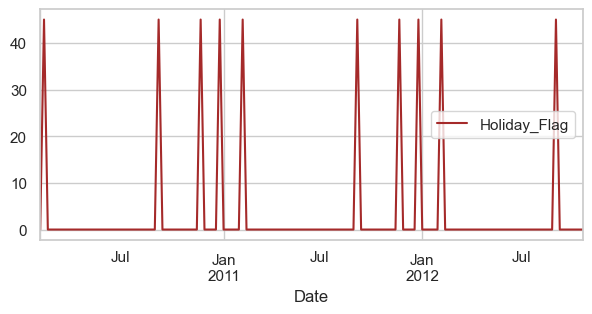

In [30]:
sales=df.groupby("Date")[["Holiday_Flag"]].sum()
sales.plot(color='brown',figsize=(7,3))

#### This graph show months that haven't sales becouse holidays.

## Using Calender

In [31]:
pip install calmap

Note: you may need to restart the kernel to use updated packages.


In [32]:
import calmap

In [33]:
df_1 =df.groupby("Year")['Month'].value_counts().unstack().fillna(0).T
df_1

Year,2010,2011,2012
Month,,,
April,225.0,225.0,180.0
August,180.0,180.0,225.0
December,225.0,225.0,0.0
February,180.0,180.0,180.0
January,0.0,180.0,180.0
July,225.0,225.0,180.0
June,180.0,180.0,225.0
March,180.0,180.0,225.0
May,180.0,180.0,180.0


Text(0.5, 1.0, 'Sales updated per month and year')

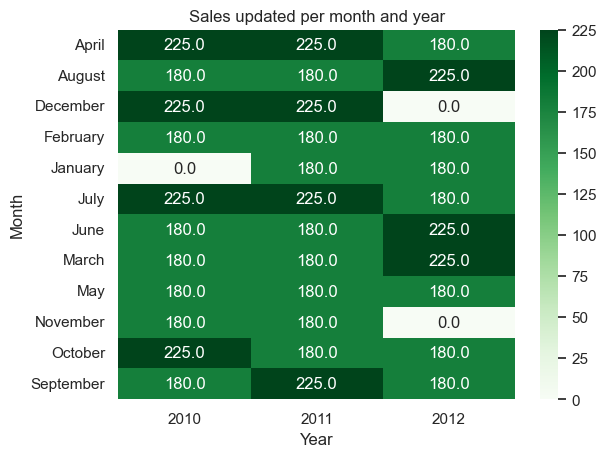

In [34]:
sns.heatmap(df_1 , cmap = "Greens" ,annot=True,fmt='.1f')
plt.title("Sales updated per month and year")

### Note : Jan/2010 ,Nov/2012 and Dec/2012 haven't sales becouse holiday.

(<Figure size 800x500 with 3 Axes>,
 array([<Axes: ylabel='2010'>, <Axes: ylabel='2011'>,
        <Axes: ylabel='2012'>], dtype=object))

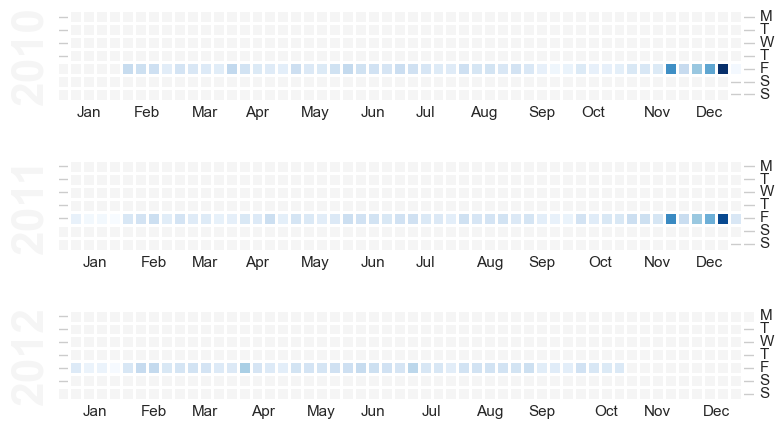

In [35]:
sales=df.groupby("Date")[["Weekly_Sales"]].sum()
calmap.calendarplot(sales, daylabels='MTWTFSS',cmap='Blues', fig_kws=dict(figsize=(8, 5)))

#### Note : weekly_sales have heigher sales at Nov and Dec at each year

# Model for weekly_sales

In [36]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

### To show using Model 

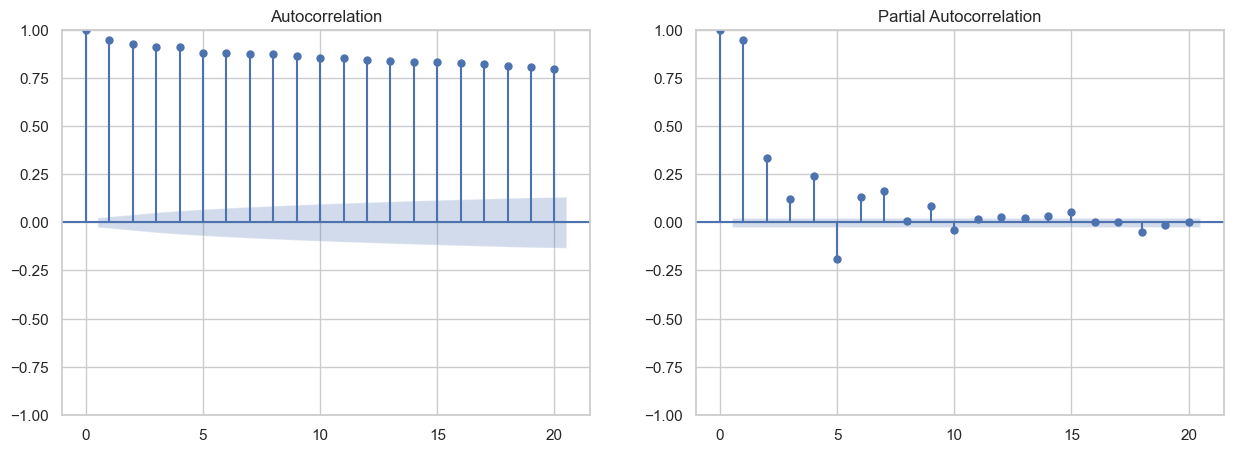

In [37]:
def ACF_and_PACF(data):
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(121)
    fig = plot_acf(data , lags = 20 , ax = ax1)
    ax2 = fig.add_subplot(122)
    fig = plot_pacf(data , lags = 20 , ax = ax2)

ACF_and_PACF(df['Weekly_Sales'])

#### I find that AC is slow and PAC is quickly so we may need AR mode

In [38]:
df = df.set_index('Date')
df.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=6435, freq=None)

In [39]:
y = sales['Weekly_Sales'].resample('1w').mean()

[]

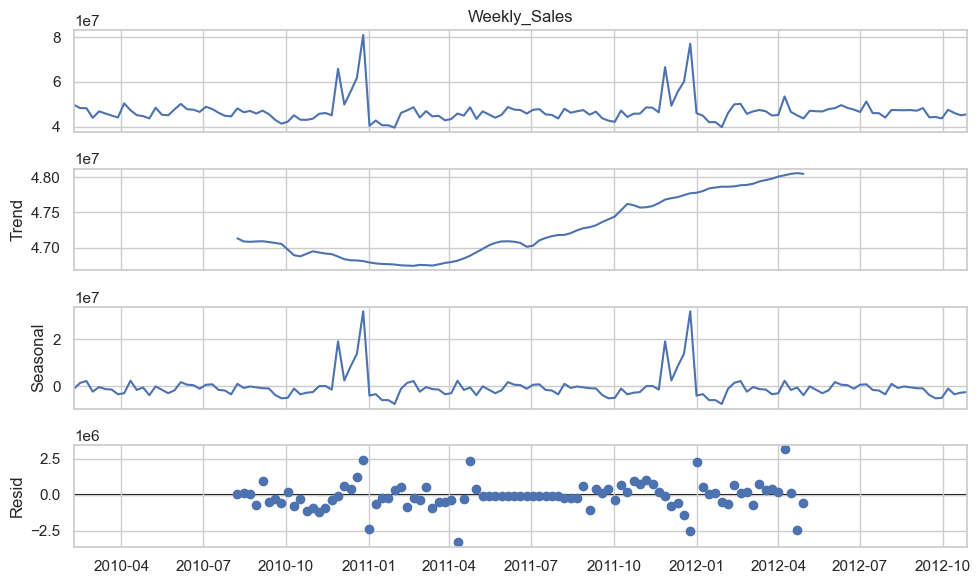

In [40]:
decomposition = sm.tsa.seasonal_decompose(y , model = "additive").plot()
plt.plot()

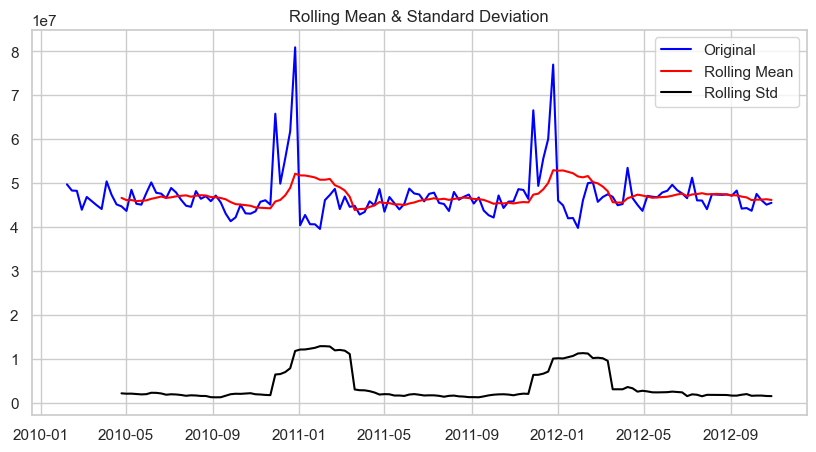

In [41]:
#Determine rolling statistics
plt.figure(figsize=(10,5))

rolmean = y.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = y.rolling(window=12).std()
#Plot rolling statistics
orig = plt.plot(y, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

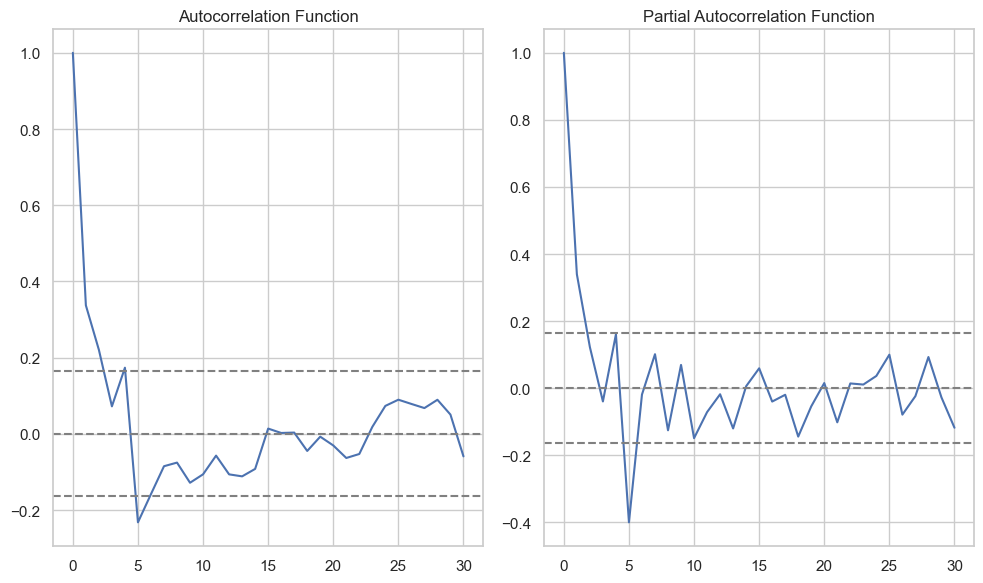

In [42]:
lag_acf = acf(y, nlags=30)
lag_pacf = pacf(y, nlags=30)

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(y)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(y)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

#### At AC when y=0.0 and x=5  then p=5 , and At PAC y=0.0 and x=3 then q=3 when differance=1

## AR+I+MA = ARIMA Model
#### Making order = (5,1,3)

## By Using Auto ARIMA

In [43]:
pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   - ------------------------------------- 20.5/625.1 kB 330.3 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/625.1 kB 495.5 kB/s eta 0:00:02
   ------- -------------------------------- 122.9/625.1 kB 1.0 MB/s eta 0:00:01
   ------------- -------------------------- 204.8/625.1 kB 1.4 MB/s eta 0:00:01
   ------------------------ --------------- 378.9/625.1 kB 1.8 MB/s eta 0:00:01
   ------------------------------ --------- 481.3/625.1 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 2.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -- ------------------------------------- 0.2/2.8 MB 5.4 MB/s eta 0:00:01
   ------ --------------------------------- 0.4/2.8 MB 5.5 MB/s eta 0:00:01
   --------- ------------------------------ 0.7/2.8 MB 5.2 MB/s eta 0:00:01
   ------------ --------------------------- 0.9/2.8 MB 5.1 MB/s eta 0:00

In [44]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(y, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=8,              # frequency of series
                      d=1,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())
print("AIC value : ",model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[8]             : AIC=4605.627, Time=0.28 sec
 ARIMA(0,1,0)(0,1,0)[8]             : AIC=4670.045, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[8]             : AIC=4623.886, Time=0.12 sec
 ARIMA(0,1,1)(0,1,1)[8]             : AIC=4603.756, Time=0.15 sec
 ARIMA(0,1,1)(0,1,0)[8]             : AIC=4648.338, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[8]             : AIC=4604.451, Time=0.22 sec
 ARIMA(0,1,1)(0,1,2)[8]             : AIC=4604.467, Time=0.41 sec
 ARIMA(0,1,1)(1,1,0)[8]             : AIC=4621.481, Time=0.10 sec
 ARIMA(0,1,1)(1,1,2)[8]             : AIC=4606.450, Time=0.69 sec
 ARIMA(0,1,0)(0,1,1)[8]             : AIC=4618.577, Time=0.10 sec
 ARIMA(0,1,2)(0,1,1)[8]             : AIC=4609.665, Time=0.20 sec
 ARIMA(1,1,0)(0,1,1)[8]             : AIC=4606.640, Time=0.14 sec
 ARIMA(1,1,2)(0,1,1)[8]             : AIC=4608.795, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[8] intercept   : AIC=4605.511, Time=0.17 sec

Best model:  ARIMA(0,1,1)(0,1,1)

### The p-values are highly significant (<< 0.05).

## Train and Test Split

In [45]:
train = y.loc['2010-02-5':'2012-02-17']
test = y.loc['2012-02-17':]

## Evaluation

In [46]:
model.fit(train)
future_forecast =model.predict(n_periods=1609)

<Axes: xlabel='Date'>

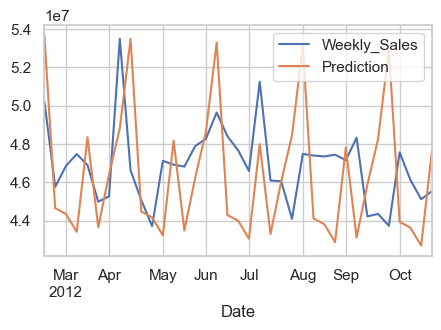

In [47]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot(figsize=(5,3))

<Axes: xlabel='Date'>

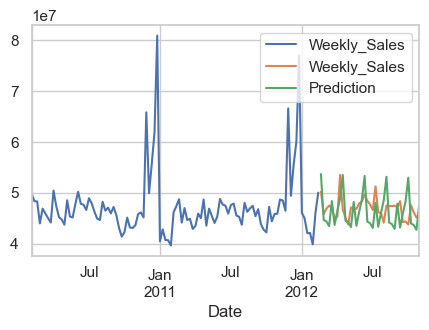

In [48]:
pd.concat([train,test,future_forecast],axis=1).plot(figsize=(5,3))

# Thanks!